#### Impact of Human Activities on Offshore Water Quality

#### Jackie(Jiaqi) Li

#### Introduction

Over the past few centuries, people have traveled farther and farther, creating pollutions to the ocean. As trade has developed, many of the things we use in our lives have become transported by ship.

Question: How do human activities along the West coast of the US affect the water temperature, salinity, and nutrient levels in offshore waters compared to a remote ocean location far from human influence?

Hypothesis: Near-shore water temperature, salinity, and nutrient level are higher than in more distant ocean waters. 

#### Description of Data

- ESD_NCRMP_CTD_2016_HI
    - DATA.GOV(data.gov)
    - I found this website from Google
    - Download the data between 11/24 - 11/29
    - Dataset contains datas from 2016/07 t- 2016/09
    - Dataset contains values of pressure, depth, pH, temperature, conductivity, salinity, and density
    - Dataset covered Oahu, kaho'olawe, French Frigate Shoals, Pearl and Hermes Atoll, Kure Atoll, Lisianski Island, Lana'i, Molokai, Niihau, Hawai'i(Big Island), and Maui
- Pudget Sound
    - BCO-DMO(bco-dmo.org)
    - Found this website from Google
    - Download the data between 11/24 - 11/29
    - Dataset contains datas from 2017/06 - 2017/09
    - Dataset contains values of pressure, depth, pH, temperature, salinity, fluorescence, and oxygen level
    - Dataset covered Pudget Sound area

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


## Loading the Data

In [2]:
# Reading the datasets
pudget_sound = pd.read_csv('Pudget Sound.csv')
esd_ncrmp = pd.read_csv('ESD_NCRMP_CTD_2016_HI.csv')

## Data Cleaning

In [3]:
# Data cleaning steps
# Handle missing values: only for numeric columns
numeric_cols = pudget_sound.select_dtypes(include=['float64', 'int64']).columns
pudget_sound[numeric_cols] = pudget_sound[numeric_cols].fillna(pudget_sound[numeric_cols].mean())

# Convert datetime columns to datetime objects
pudget_sound['ISO_DateTime_UTC'] = pd.to_datetime(pudget_sound['ISO_DateTime_UTC'])
esd_ncrmp['UTCDATETIME'] = pd.to_datetime(esd_ncrmp['UTCDATETIME'])

# Optional: Renaming columns for consistency (if needed)
pudget_sound.rename(columns={'Temperature': 'Temp_C', 'Salinity': 'Salinity_PSU'}, inplace=True)

# Check for cleaned data
print("Pudget Sound Data:")
print(pudget_sound.head())
print("\nESD NCRMP Data:")
print(esd_ncrmp.head())

Pudget Sound Data:
  Station   Latitude  Longitutde          ISO_DateTime_UTC  Depth     pH  \
0      P8  47.897333   -122.6055 2017-08-30 01:57:25+00:00    1.0  8.083   
1      P8  47.897333   -122.6055 2017-08-30 01:57:25+00:00    2.0  8.078   
2      P8  47.897333   -122.6055 2017-08-30 01:57:25+00:00    3.0  8.071   
3      P8  47.897333   -122.6055 2017-08-30 01:57:25+00:00    4.0  8.063   
4      P8  47.897333   -122.6055 2017-08-30 01:57:25+00:00    5.0  8.055   

    Temp_C  Salinity_PSU  Fluorescence  Oxygen_mg_L  Oxygen_mM_L pH_corrected  \
0  13.1825       29.7905        4.5614       7.7163      241.137  7.840031501   
1  13.0531       29.8827        4.2235       7.4193      231.855  7.835031501   
2  12.9184       29.9563        3.6185       7.2714      227.235  7.828031501   
3  12.7657       30.0271        3.3374       7.2605      226.894  7.820031501   
4  12.7614       30.0300        3.2390       7.2576      226.803  7.812031501   

   Pressure  
0     1.009  
1     2.0

## Plotting

#### This is the Temperature vs. Salinity part

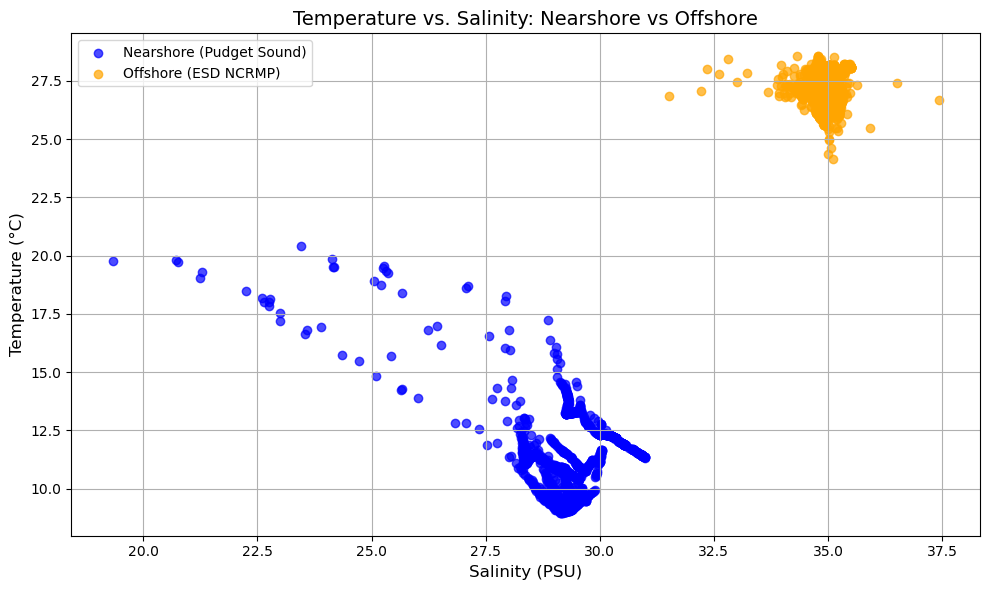

In [4]:
# Figure 1: Temperature vs. Salinity for Nearshore vs Offshore
plt.figure(figsize=(10, 6))

# Plotting for Nearshore (Pudget Sound)
plt.scatter(pudget_sound['Salinity_PSU'], pudget_sound['Temp_C'], color='blue', label='Nearshore (Pudget Sound)', alpha=0.7)

# Plotting for Offshore (ESD NCRMP)
plt.scatter(esd_ncrmp['SALN_PSU'], esd_ncrmp['TEMP_DEGC'], color='orange', label='Offshore (ESD NCRMP)', alpha=0.7)

# Title and labels
plt.title('Temperature vs. Salinity: Nearshore vs Offshore', fontsize=14)
plt.xlabel('Salinity (PSU)', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)

# Display legend and grid
plt.legend()
plt.grid(True)

# Save and show the plot
plt.tight_layout()
plt.savefig('temperature_salinity_comparison.png')
plt.show()

##### Result
From this figure we learned that both water temperature and salinity in Pudget Sound are lower than the Hawai area. 

#### This is the Temperature Distribution part

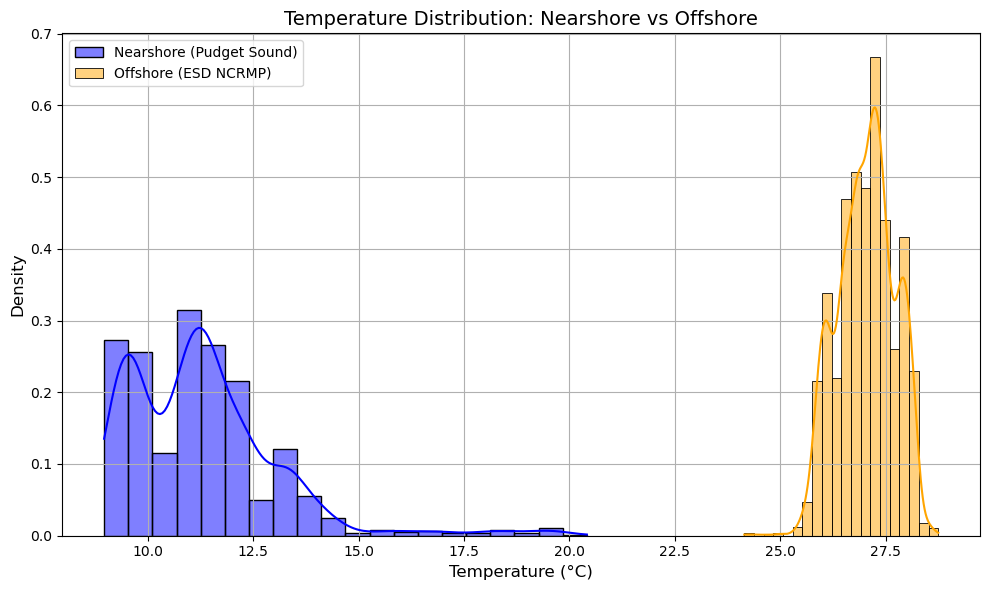

In [5]:
# Figure 2: Distribution of Temperature for Nearshore vs Offshore
plt.figure(figsize=(10, 6))

# Plotting distribution of temperature for both datasets
sns.histplot(pudget_sound['Temp_C'], color='blue', label='Nearshore (Pudget Sound)', kde=True, stat='density', bins=20)
sns.histplot(esd_ncrmp['TEMP_DEGC'], color='orange', label='Offshore (ESD NCRMP)', kde=True, stat='density', bins=20)

# Title and labels
plt.title('Temperature Distribution: Nearshore vs Offshore', fontsize=14)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Display legend and grid
plt.legend()
plt.grid(True)

# Save and show the plot
plt.tight_layout()
plt.savefig('temperature_distribution_comparison.png')
plt.show()

##### Result
From this figure we learned that the water temperature in Pudget Sound is lower than Hawai area. 

#### This is the pH Comparison part

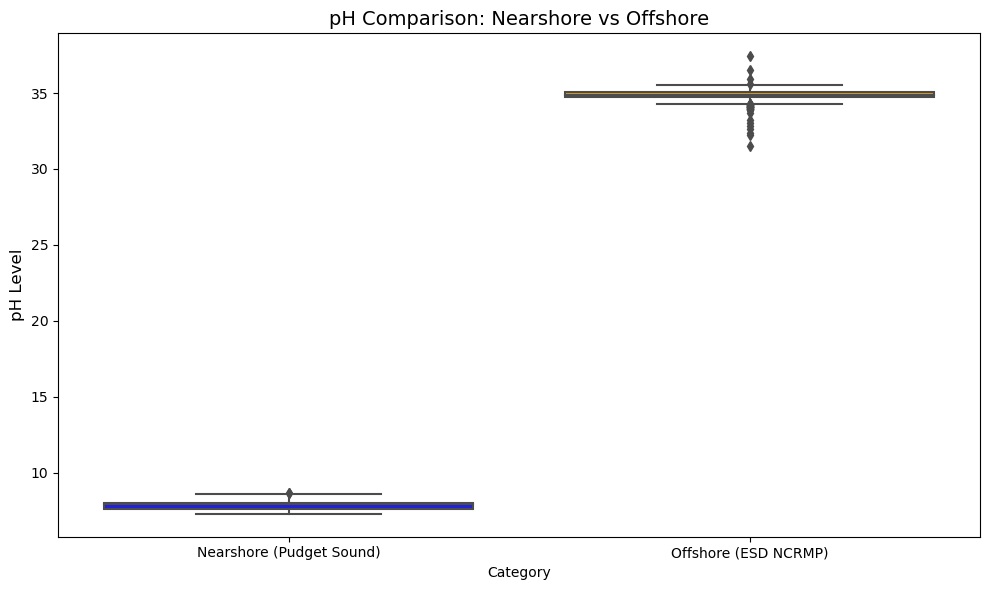

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine pH data into a single DataFrame
pudget_sound['Category'] = 'Nearshore (Pudget Sound)'
esd_ncrmp['Category'] = 'Offshore (ESD NCRMP)'

# If comparing `pH`, ensure both datasets have it; otherwise, adjust column usage
combined_data = pd.concat([
    pudget_sound[['pH', 'Category']].rename(columns={'pH': 'Value'}),
    esd_ncrmp[['SALN_PSU', 'Category']].rename(columns={'SALN_PSU': 'Value'})  # Replace `SALN_PSU` if comparing other metrics
])

# Figure 3: pH Comparison for Nearshore vs Offshore
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='Category', y='Value', palette=['blue', 'orange'])

# Title and labels
plt.title('pH Comparison: Nearshore vs Offshore', fontsize=14)
plt.ylabel('pH Level', fontsize=12)

# Save and show the plot
plt.tight_layout()
plt.savefig('ph_comparison.png')
plt.show()


##### Result
From this figure we learned that the pH level in Pudget is significantly lower than Hawai area. 

Over all my result is not supporting my hypothesis. 

#### Limitations and Future Work

- The most important thing I'd like to say is choose the datasets wisely. Reason why my results do not support the hypothesis may be that I used inappropriate datasets. The latitude for Pudget Sound is different compare to Hawai area. 
- Also, I should try to find the datasets before I start coding, so that I know the topic I choose is solid. 
- For future, I would like to collect more data to feed into the code, which should give us the results that support my hypothesis. 

#### References
- “Introduction to BCO.” DMO, 6 Dec. 2024, www.bco-dmo.org/. 
- “Data.Gov Home.” Data.Gov, data.gov/. Accessed 6 Dec. 2024. 
- “Main Maritime Shipping Routes and Chokepoints: Port Economics, Management and Policy.” Port Economics, Management and Policy | A Comprehensive Analysis of the Port Industry, 16 Oct. 2024, porteconomicsmanagement.org/pemp/contents/part1/interoceanic-passages/main-maritime-shipping-routes/. 